## 회귀
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘


### 회귀 평가 지표
* MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
* MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
* RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
* R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.

https://blog.naver.com/PostView.nhn?blogId=bya135&logNo=222228358219&parentCategoryNo=&categoryNo=24&viewDate=&isShowPopularPosts=true&from=search<br>
https://libertegrace.tistory.com/entry/Evaluation2


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_excel('auto-mpg.xlsx', engine='openpyxl')
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [124]:
len(df)

398

In [125]:
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [126]:
ndf.horsepower.replace('?',np.nan, inplace=True)
ndf.dropna(subset=['horsepower'], axis=0, inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [127]:
ndf.to_pickle('auto-mpg.pkl')
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [128]:
# ndf.horsepower.replace('?',0, inplace=True)
# meanh=np.round(ndf.horsepower.mean(),0)
# meanh
# ndf.horsepower.replace(0,meanh, inplace=True)

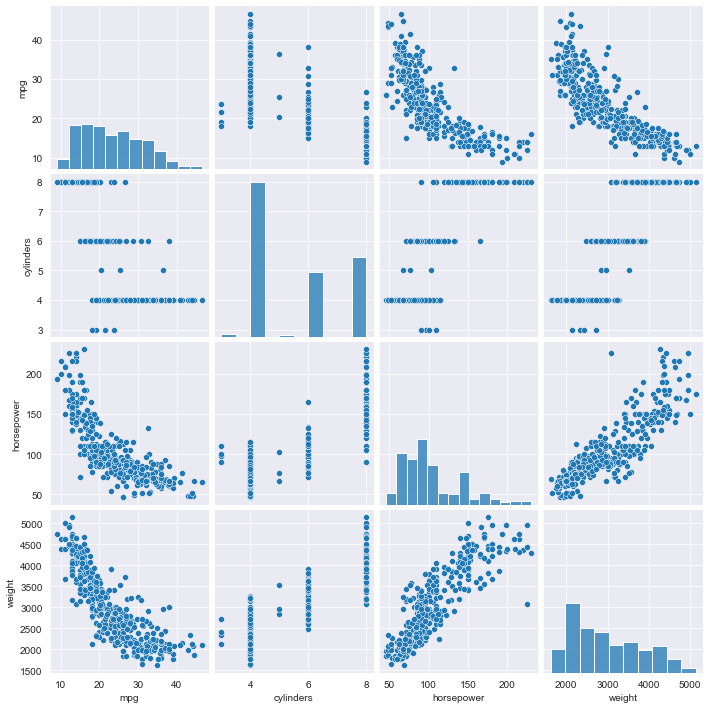

In [129]:
sns.pairplot(ndf)

In [130]:
x = ndf[['weight']] # 독립변수
y = ndf[['mpg']] # 종속변수

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=11)
print(len(x_train), len(x_test))

274 118


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

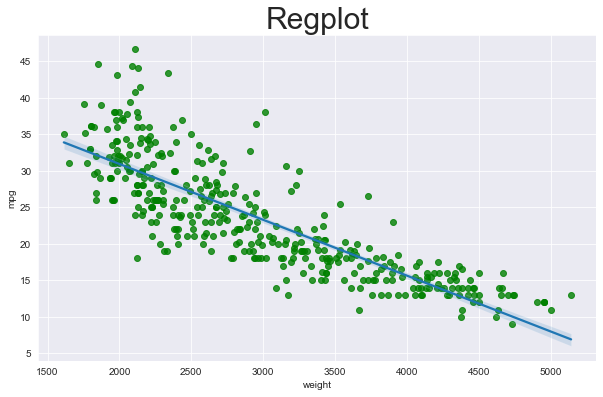

In [131]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))

plt.title('Regplot', fontsize=30)
sns.regplot(ax=axes, x='weight', y='mpg', data=ndf, scatter_kws={'color':'green'})

In [132]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test.values[::], y_preds)

print(f'MSE : {np.round(mse,4)}, RMSE : {round(rmse,4)}, R2_Score : {round(r2_score,4)}')

MSE : 22.169, RMSE : 4.7084, R2_Score : 0.6411


In [140]:
type(y_test)

pandas.core.frame.DataFrame

In [41]:
# 회귀식의 기울기, 절편
# 기본적인 학습방식, 가중치를 더해 학습시켜 기울기를 구함
print(lr.coef_)
print(lr.intercept_)

[[-0.00762163]]
[45.9712177]


<AxesSubplot:ylabel='Density'>

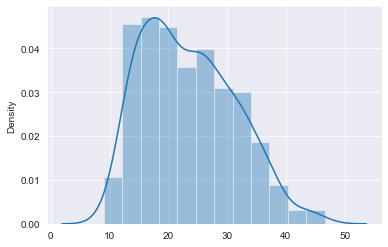

In [42]:
sns.distplot(y)

<AxesSubplot:ylabel='Density'>

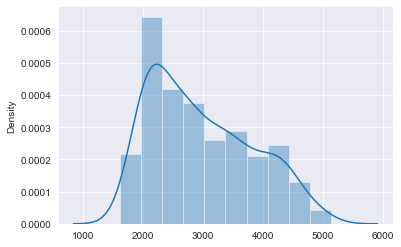

In [43]:
sns.distplot(x)

<AxesSubplot:ylabel='Density'>

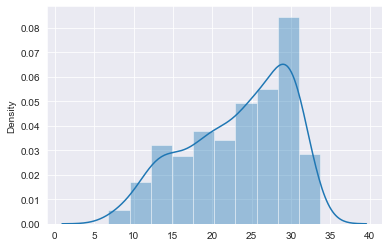

In [44]:
y_hat = lr.predict(x)
sns.distplot(y_hat)

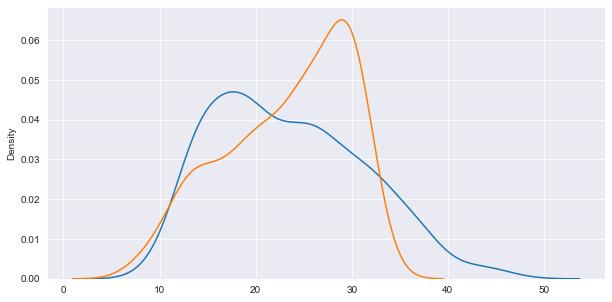

In [46]:
# 실제 값은 왼쪽으로 편향, 예측값은 오른쪽으로 편향되는 경향을 보임 > 모형의 오차를 줄일 필요가 있음
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')

## 다항 회귀분석
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관<br>
https://chana.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D5-%EB%8B%A4%ED%95%AD-%ED%9A%8C%EA%B7%80


In [48]:
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [56]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

print(x_train.shape, x_train_poly.shape,'\n')
print(poly.get_feature_names(),'\n')
print(x_train_poly[:5])

(274, 1) (274, 3) 

['1', 'x0', 'x0^2'] 

[[1.0000000e+00 2.1200000e+03 4.4944000e+06]
 [1.0000000e+00 4.4990000e+03 2.0241001e+07]
 [1.0000000e+00 1.8450000e+03 3.4040250e+06]
 [1.0000000e+00 2.0450000e+03 4.1820250e+06]
 [1.0000000e+00 1.9850000e+03 3.9402250e+06]]


In [57]:
pr = LinearRegression()
pr.fit(x_train_poly, y_train)
# 설계한 모형의 오차가 작다면 r_square가 커지고 설계한 모형의 오차가 크다면 r_square가 작아진다.
x_test_poly = poly.fit_transform(x_test)
r_square = pr.score(x_test_poly, y_test)
r_square

0.6368479947378759

In [58]:
print(pr.coef_)
print(pr.intercept_)

[[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]]
[65.12274143]


InvalidIndexError: (slice(None, None, None), None)

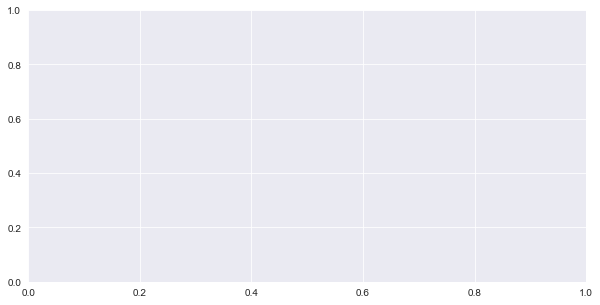

In [63]:
y_hat_test = pr.predict(x_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_train,y_train,'o',label='Train Data')#데이터 분포
ax.plot(x_test, y_hat_test, 'r+', label = 'Predicted value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

Text(0, 0.5, 'mpg')

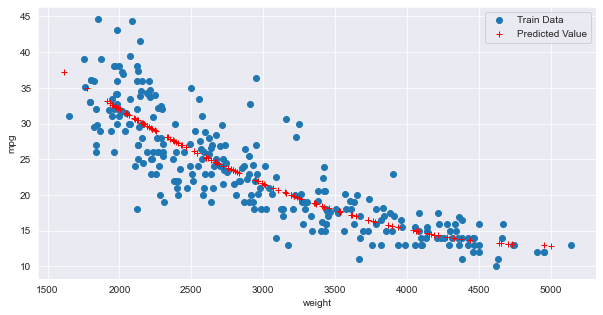

In [66]:
y_hat_test = pr.predict(x_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x_train.values[:,:], y_train.values[:,:], 'o', label='Train Data') # 데이터 분포
ax.plot(x_test.values[:,:], y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')


## 다중 회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습


In [67]:
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [68]:
x = ndf.drop('mpg',axis=1)
y = ndf['mpg']

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=10)
print(x_train.shape, x_test.shape)

(274, 3) (118, 3)


In [73]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_square = lr.score(x_test, y_test)
print(f'MSE : {round(mse,4)}, RMSE : {round(rmse,4)}, R_squre : {round(r_square,4)}')

MSE : 17.3301, RMSE : 4.1629, R_squre : 0.6939


In [74]:
print(lr.coef_)
print(lr.intercept_)

[-0.60691288 -0.03714088 -0.00522268]
46.41435126963405


#### 과제_0915_2
아래 boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [83]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
bdf = pd.DataFrame(boston.data, columns=boston.feature_names)

bdf['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bdf.shape)
bdf.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [84]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


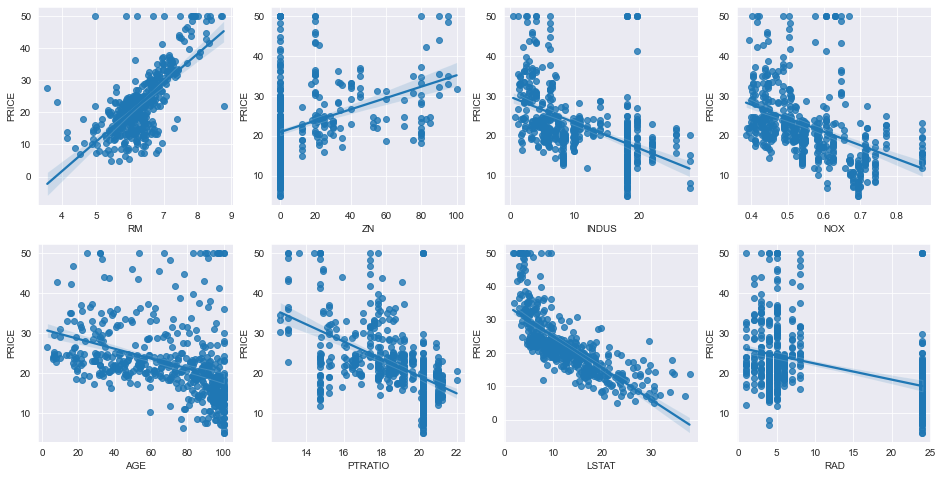

In [85]:
# 2개의 행과 4개의 열을 가진 subplot을 이용, axs는 4*2개의 ax를 가짐
fig,axs = plt.subplots(figsize = (16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bdf, ax=axs[row][col])

다른 칼럼보다 RM, LSTAT의 PRICE 영향도가 가장 두드러짐, RM(방 개수)은 양방향의 선형성(Positive Linearity)이 가장 크다.
즉, 방의 크기가 클수록 가격이 증가하는 모습을 확연히 두드러진다.
이에 반해 LSTAT(하위 계층의 비율)은 음방향의 선형성(Negative Linearity)이 가장 크다.
하위 계층의 비율이 적을수록 PRICE가 증가한단 것이다.

In [148]:
from sklearn.metrics import mean_squared_error, r2_score
y_target = bdf['PRICE']
x_data = bdf.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

# 선형회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square2 = lr.score(x_test, y_test)

print(f'MSE : {round(mse,4)}, RMSE : {round(rmse,4)}, R_squre : {round(r_square2,4)}')
print(f'Variance score` : {r2_score(y_test, y_preds)}')

MSE : 17.2969, RMSE : 4.159, R_squre : 0.7572
Variance score` : 0.7572263323138921


In [150]:
# 회귀계수 값, 절편 값 게산
print('회귀계수 값 : ', np.round(lr.coef_,1))
print('절편 값 : ', lr.intercept_)

회귀계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
절편 값 :  40.995595172164336


In [151]:
# 회귀계수를 높은 값부터 매핑
coeff = pd.Series(data = np.round(lr.coef_,1), index = x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [152]:
from sklearn.model_selection import cross_val_score

y_target = bdf['PRICE']
x_data = bdf.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : ', np.round(avg_rmse, 2))


5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE :  5.83
